In [606]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import Callback
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

tf.__version__


'2.10.0'

In [607]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

In [608]:
train_data[10].shape

(28, 28)

In [609]:
train_labels[11]

5

In [610]:
train_data = train_data / 255
train_data = train_data.astype(np.float32)
train_labels = train_labels.astype(np.int32)

test_data = test_data / 255
test_data = test_data.astype(np.float32)
test_labels = test_labels.astype(np.int32)


In [611]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [612]:
def one_hot_label(image, label):
    label = tf.one_hot(label, depth=10)
    return image, label

In [613]:
batch_size = 64
max_epochs = 10

N = len(train_data)
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_dataset = train_dataset.shuffle(buffer_size=10000)
train_dataset = train_dataset.map(one_hot_label)
train_dataset = train_dataset.repeat().batch(batch_size=batch_size)
print(train_dataset)

test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))
test_dataset = test_dataset.map(one_hot_label)
test_dataset = test_dataset.batch(batch_size=batch_size)
print(test_dataset)

<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>


label = 9


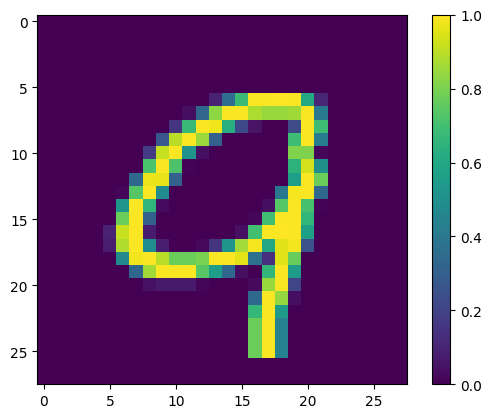

In [614]:
index = 3000
print("label = {}".format(train_labels[index]))
plt.imshow(train_data[index])
plt.colorbar()
plt.show()

In [615]:
model = keras.Sequential([

    keras.layers.Reshape(input_shape=(28, 28), target_shape=(28, 28, 1)),

    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [616]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              #모델 아웃풋이 logiist인 상태 자체적으로 로짓과 액티베이션을 분리해서 다양한 액티베이션으로 분석함

              metrics=['accuracy'])

In [617]:
# without training, just inference a model in eager execution:
predictions = model(train_data[0:1], training=False)
print("Predictions: ", predictions.numpy())

Predictions:  [[0.09332078 0.10597453 0.09889054 0.11308595 0.09937628 0.09444894
  0.09728424 0.09744291 0.09592026 0.10425562]]


In [618]:
model.summary() 

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_34 (Reshape)        (None, 28, 28, 1)         0         
                                                                 
 conv2d_133 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_100 (MaxPooli  (None, 14, 14, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_134 (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_101 (MaxPooli  (None, 7, 7, 64)         0         
 ng2D)                                                           
                                                                 
 conv2d_135 (Conv2D)         (None, 7, 7, 64)        

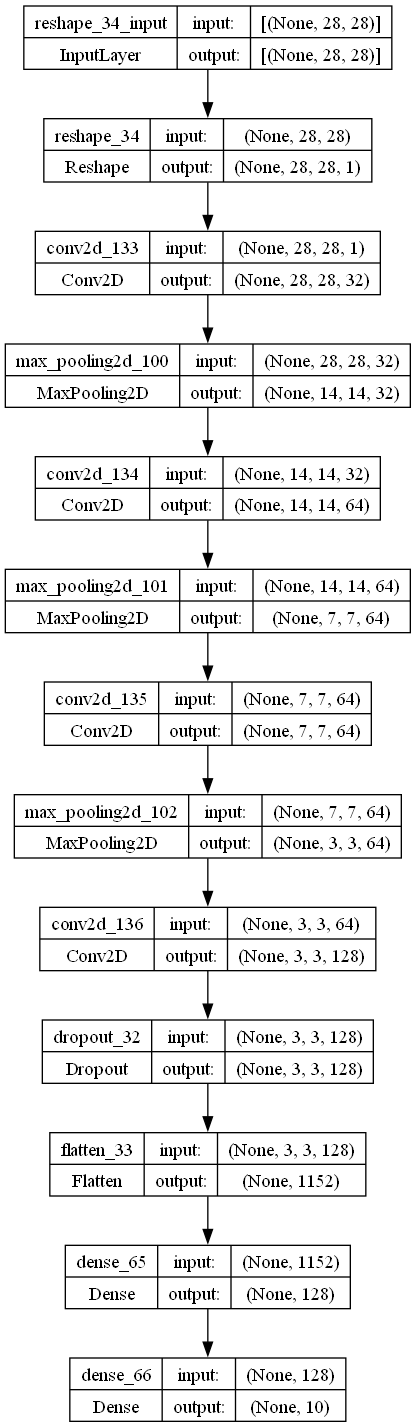

In [619]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [620]:
history = model.fit(train_dataset, epochs=max_epochs,
                    steps_per_epoch=len(train_data) // batch_size)

Epoch 1/10
937/937 [==============================] - 4s 4ms/step - loss: 0.4999 - accuracy: 0.8461
Epoch 2/10
937/937 [==============================] - 4s 4ms/step - loss: 0.1169 - accuracy: 0.9636
Epoch 3/10
937/937 [==============================] - 4s 4ms/step - loss: 0.0849 - accuracy: 0.9737
Epoch 4/10
937/937 [==============================] - 3s 4ms/step - loss: 0.0691 - accuracy: 0.9783
Epoch 5/10
937/937 [==============================] - 3s 4ms/step - loss: 0.0585 - accuracy: 0.9813
Epoch 6/10
937/937 [==============================] - 3s 4ms/step - loss: 0.0486 - accuracy: 0.9849
Epoch 7/10
937/937 [==============================] - 4s 4ms/step - loss: 0.0428 - accuracy: 0.9865
Epoch 8/10
937/937 [==============================] - 4s 4ms/step - loss: 0.0396 - accuracy: 0.9873
Epoch 9/10
937/937 [==============================] - 4s 4ms/step - loss: 0.0353 - accuracy: 0.9885
Epoch 10/10
937/937 [==============================] - 4s 4ms/step - loss: 0.0322 - accuracy: 0.9894

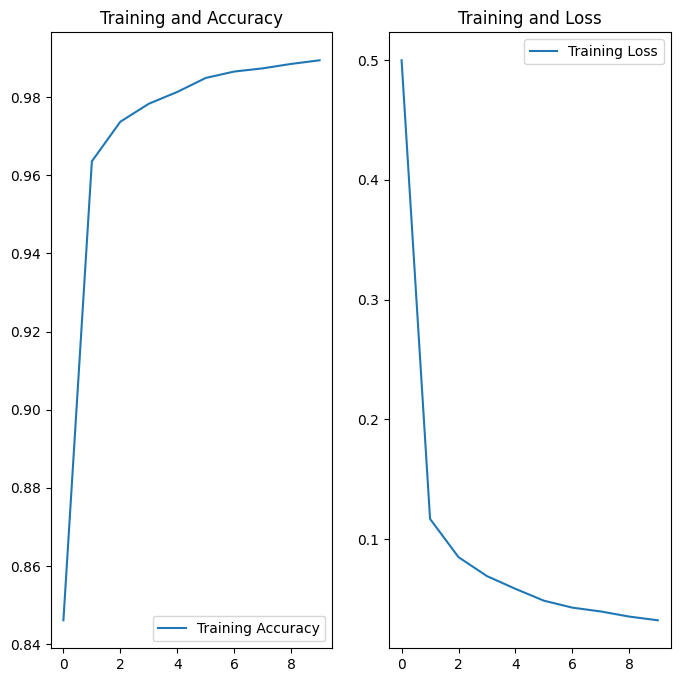

In [621]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs_range = range(max_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training and Loss')
plt.show()

In [622]:
results = model.evaluate(test_dataset, steps=int(len(test_data) / batch_size))

156/156 [==============================] - 0s 2ms/step - loss: 0.0261 - accuracy: 0.9902


In [623]:
# loss
print("loss value: {:.3f}".format(results[0]))
# accuracy
print("accuracy value: {:.4f}%".format(results[1] * 100))

loss value: 0.026
accuracy value: 99.0184%
